In [1]:
import jsonlines
import pandas as pd

In [49]:
book_df = pd.read_csv("amazon_com_extras.csv", encoding='latin1')

In [50]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63748 entries, 0 to 63747
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   asin       63748 non-null  object
 1   group      63748 non-null  object
 2   format     63747 non-null  object
 3   title      63747 non-null  object
 4   author     63661 non-null  object
 5   publisher  57263 non-null  object
dtypes: object(6)
memory usage: 2.9+ MB


In [4]:
# Read JSON file in chunks
chunk_size = 100000  # Adjust the chunk size as needed
chunks = []
with open('Kindle_Store.json', 'r') as file:
    for chunk in pd.read_json(file, chunksize=chunk_size, lines=True):
        chunks.append(chunk)

# Concatenate all chunks to form a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [52]:
df = df[df['style'] == {'Format:': ' Kindle Edition'}]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5045160 entries, 9 to 5722987
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   overall               int64 
 1   verified              bool  
 2   reviewTime            object
 3   reviewerID            object
 4   asin                  object
 5   style                 object
 6   reviewerName          object
 7   reviewText            object
 8   summary               object
 9   unixReviewTime        int64 
 10  vote                  object
 11  image                 object
 12  processed_reviewText  object
 13  processed_summary     object
 14  author                object
 15  wordCount             int64 
dtypes: bool(1), int64(3), object(12)
memory usage: 620.7+ MB


In [6]:
def count_words(text):
    return len(str(text).split())

In [43]:
df['wordCount'] = df['reviewText'].apply(count_words)

In [41]:
df = pd.merge(df, book_df[['asin', 'author']], on='asin', how='left')

In [54]:
df.head(50)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,processed_reviewText,processed_summary,author,wordCount
9,5,True,"12 16, 2014",A24582E5Z79UT6,1423600150,{'Format:': ' Kindle Edition'},Susan W,For the salsa lover who likes new recipes!!,Five Stars,1418688000,NaN,NaN,salsa lover likes new recipes,five stars,NaN,8
10,1,True,"10 27, 2014",A2U8TXDL3E4VBQ,1423600150,{'Format:': ' Kindle Edition'},Nelson Almeida,Recipes are good but the kindle book is just t...,Very bad look in old black and white photocopi...,1414368000,NaN,NaN,recipes good kindle book terrible black white ...,bad look old black white photocopies style,NaN,60
14,1,True,"05 7, 2013",A1Y8PL0BD82ZFH,1423600150,{'Format:': ' Kindle Edition'},Kindle Customer,No color photos. Would not recommend to others...,Not in color as portrayed on Amazon site,1367884800,NaN,NaN,color photos would recommend others problem co...,color portrayed amazon site,NaN,22
15,3,True,"10 11, 2014",A36PGTGIU6TWY2,B000FA5KK0,{'Format:': ' Kindle Edition'},Timothy Isaacson,"Enjoyed the read. A bit of a twist to it, fun ...",western with a twist.,1412985600,NaN,NaN,enjoyed read bit twist fun trying figure going...,western twist,NaN,32
16,5,True,"10 5, 2014",A176WT5VCAX69W,B000FA5KK0,{'Format:': ' Kindle Edition'},George,I have enjoyed all work by this author,Five Stars,1412467200,NaN,NaN,enjoyed work author,five stars,NaN,8
17,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN,pretty good story little exaggerated liked pre...,pretty good story,NaN,35
18,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN,read max brand westerns know expect treat let ...,good book,NaN,28
19,5,True,"02 18, 2014",A1B26H4XPQ1FKP,B000FA5KK0,{'Format:': ' Kindle Edition'},Wayne Harrill,I had missed reading this rare treasure thank ...,Surprise,1392681600,NaN,NaN,missed reading rare treasure thank allowing pl...,surprise,NaN,37
20,3,False,"01 14, 2014",A1H9JWUY29A7CD,B000FA5KK0,{'Format:': ' Kindle Edition'},buster be a good story,tenderfoot was too much for a real cowboy not ...,trailing a big tall tale,1389657600,NaN,NaN,tenderfoot much real cowboy west establish bet...,trailing big tall tale,NaN,24
21,3,True,"01 13, 2014",A3U7U7PCX8HS4V,B000FA5KK0,{'Format:': ' Kindle Edition'},Amazon Customer,Enjoyed the book but thought he spends too muc...,First Max Brand I've read,1389571200,NaN,NaN,enjoyed book thought spends much time trying p...,first max brand read,NaN,20


In [56]:
top_50_wordcount = df.nlargest(50, 'wordCount')

print(top_50_wordcount['wordCount'])

4374257    6140
3634417    5613
1676117    5608
3105789    5479
3593533    5468
4976795    5372
4630322    5338
1675755    5307
1572084    5297
5274732    5112
3595502    5091
3721733    5091
4177847    5091
4251658    5090
3757056    4991
1262409    4980
4084053    4922
2959822    4879
4999283    4829
5277518    4819
4077565    4816
3699512    4785
4055652    4769
1530952    4461
92684      4417
4252250    4305
4952232    4235
1572318    4217
5272077    4161
5273770    4161
5277514    4161
5280209    4161
5285506    4161
5286464    4161
5292806    4161
5294293    4161
5295592    4161
5296272    4161
5316282    4161
5331319    4161
5350839    4161
5360002    4161
2207413    4135
4150021    4081
5634759    4065
3599172    4027
3815918    3972
2438626    3941
3771743    3908
4745113    3840
Name: wordCount, dtype: int64


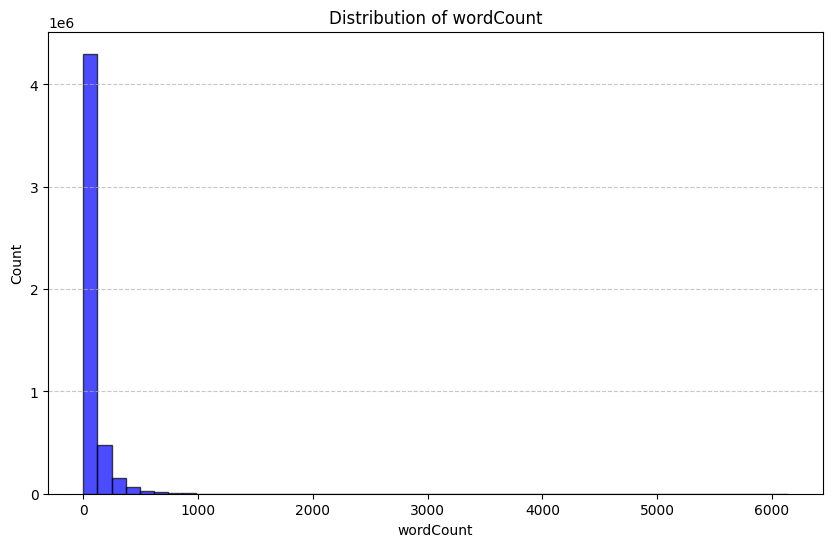

In [55]:
import matplotlib.pyplot as plt

# Assuming 'wordCount' is the name of the variable in your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['wordCount'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of wordCount')
plt.xlabel('wordCount')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords and Punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

# Text preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Check for NaN values
    if pd.isnull(text):
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization and removing stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    return ' '.join(tokens)

# Apply text preprocessing to 'reviewText' and 'summary' columns
df['processed_reviewText'] = df['reviewText'].apply(preprocess_text)
df['processed_summary'] = df['summary'].apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_reviewText = vectorizer.fit_transform(df['processed_reviewText'])
X_summary = vectorizer.fit_transform(df['processed_summary'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dethloffe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dethloffe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df.head(50)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,processed_reviewText,processed_summary
0,4,True,"12 29, 2012",A27UD5HYAKBL97,1423600150,{'Format:': ' Hardcover'},Cheryl,If you like making salsas this is a great book...,Great Book,1356739200,NaN,NaN,like making salsas great book different ideas ...,great book
1,5,True,"03 6, 2012",A8P5DK8LLOYGH,1423600150,{'Format:': ' Hardcover'},Shay365,great little book. simple and right to the poi...,great little book,1330992000,3,NaN,great little book simple right point good basi...,great little book
2,5,True,"08 12, 2009",A3OM9W7DXSUIIY,1423600150,{'Format:': ' Hardcover'},R. Peckham,This book has good pics of the recipes and eas...,very good bok with good ideas.,1250035200,NaN,NaN,book good pics recipes easy create well,good bok good ideas
3,3,False,"11 3, 2006",A3DPAR2PWB9BT8,1423600150,{'Format:': ' Hardcover'},JJSS,"I admire the SF School of Cooking, but was dis...",Ok cookbook,1162512000,3,NaN,admire sf school cooking disappointed cookbook,ok cookbook
4,5,False,"04 11, 2006",A2ONTBSAX7GIOV,1423600150,{'Format:': ' Hardcover'},Three Guys from Miami,Many people are surprised to find out that we ...,Fresh and Tasty Ideas from Santa Fe!,1144713600,15,NaN,many people surprised find cook cuban yes actu...,fresh tasty ideas santa fe
5,5,False,"03 1, 2015",A2PRJSH8RLRB46,1423600150,{'Format:': ' Hardcover'},William Yarberry,Yum!,Five Stars,1425168000,NaN,NaN,yum,five stars
6,5,True,"02 11, 2015",A2PP8CPXOFI5I6,1423600150,{'Format:': ' Hardcover'},Larry Occhipinti DVM,Excellent.,Five Stars,1423612800,NaN,NaN,excellent,five stars
7,5,True,"01 9, 2015",A3CWUPYGW55FUE,1423600150,{'Format:': ' Hardcover'},Nell Bryant,Great recipes. I feel like I'm in the great S...,Great recipes. I feel like I'm in the great ...,1420761600,NaN,NaN,great recipes feel like great southwest,great recipes feel like great
8,5,True,"12 19, 2014",ABMI85UTQ7WN5,1423600150,{'Format:': ' Hardcover'},Edward A. Rubin,Cannot recommend the salsas in this book stron...,Highly Recommended,1418947200,NaN,NaN,recommend salsas book strongly enough follow d...,highly recommended
9,5,True,"12 16, 2014",A24582E5Z79UT6,1423600150,{'Format:': ' Kindle Edition'},Susan W,For the salsa lover who likes new recipes!!,Five Stars,1418688000,NaN,NaN,salsa lover likes new recipes,five stars
